In [67]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

Max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

In [90]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,Max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,Min, [-40, 20, 0])

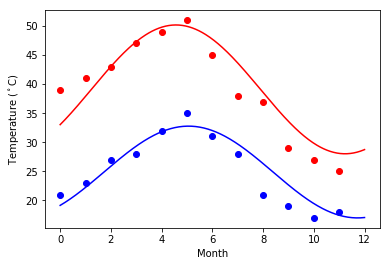

In [69]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r')
plt.plot(months, Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.show()

In [239]:
import pandas as pd
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


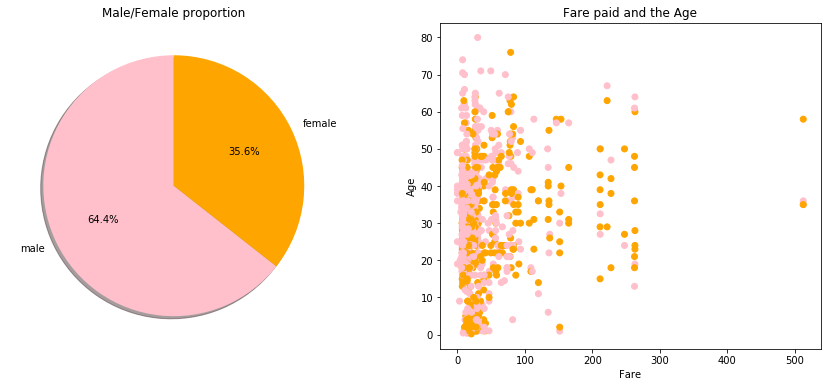

In [243]:
titanic = titanic.dropna(subset=['sex'])
count=titanic['sex'].value_counts()
colors = ['pink', 'orange']
f, (ax1, ax2) = plt.subplots(1, 2 , figsize=(15,6))
ax1.pie(count.values.tolist(), labels=count.index.values.tolist(), colors=colors,startangle=90,shadow=True, autopct='%.1f%%')
ax1.set_title('Male/Female proportion')

colors = {'male':'pink', 'female':'orange'}
ax2.scatter(titanic.fare,titanic.age,c=titanic['sex'].map(colors))  
ax2.set_xlabel('Fare')
ax2.set_ylabel('Age')
ax2.set_title('Fare paid and the Age');